
The cells below load the best DCGAN and SAGAN models and generate 8x8 grids taken from the generator

In [0]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from dcgan import DCGAN 
from sagan import SAGAN 
import calc_fid
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

dcgan_best_model = "./dcgan_netG_epoch_847.pth"
sagan_best_model = "./sagan_netG_epoch_300.pth"
batch_size = 64
inception_batch_size = 300
num_classes = 10
nz = 100

use_gpu = torch.cuda.is_available()

dcgan = DCGAN(ngpu=1) if use_gpu else DCGAN(ngpu=0)
sagan = SAGAN(ngpu=1) if use_gpu else SAGAN(ngpu=0)
device = torch.device("cuda" if use_gpu else "cpu")
dcgan_model = torch.load(dcgan_best_model, map_location=device)
sagan_model = torch.load(sagan_best_model, map_location=device)
# Init Generator
dcgan.netG.load_state_dict(dcgan_model)
sagan.netG.load_state_dict(sagan_model)

if use_gpu:
    dcgan.netG.cuda()
    sagan.netG.cuda()
    
fixed_noise = torch.randn(batch_size, nz, 1, 1, device=device)

inception = calc_fid.load_inception(use_gpu=use_gpu)

def get_labels(size, class_id=None):
    if class_id is None:
        labels = torch.zeros(size).long().random_(0, num_classes)
    else:
        labels = torch.zeros(size).long().fill_(class_id)
    y_onehot = torch.FloatTensor(size, num_classes)
    y_onehot.zero_()
    y_onehot.scatter_(1, labels.unsqueeze(1), 1)
    return y_onehot.unsqueeze(2).unsqueeze(3).to(device, non_blocking=True)

def show_imgs(fake):
    grid_img = torchvision.utils.make_grid(fake.detach(), nrow=8)
    plt.imshow(grid_img.permute(1, 2, 0))
    
def dev_safe(obj):
  return obj if not use_gpu else obj.cpu().detach()


def random_noise(batch_size):
  return  torch.randn(batch_size, nz, 1, 1, device=device)

**The cell below generates a random set of images using the DCGAN generator network, and calculates the FID score**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Files already downloaded and verified
Calculating FID...
Loaded 256 real test samples
Generated 256 fake samples
%%%%%%%%%%%%%FID Score:  111.67476862366433
FID is  111.67476862366433


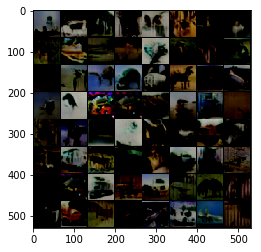

In [0]:
fake = dcgan.netG(fixed_noise)
show_imgs(dev_safe(fake))
fid = calc_fid.calc_fid_single_epoch(dcgan.netG, inception, device)
print("FID is ", fid)

**The cell below generates a random set of images using the SAGAN generator network, and calculates the FID score**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Files already downloaded and verified
Calculating FID...
Loaded 256 real test samples
Generated 256 fake samples
%%%%%%%%%%%%%FID Score:  127.65859597142995
FID is  127.65859597142995


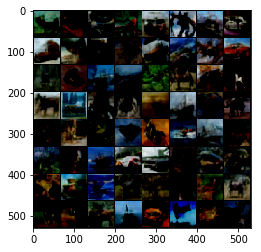

In [0]:
random_labels_one_hot = get_labels(batch_size, None)
fake = sagan.netG(fixed_noise, random_labels_one_hot)
show_imgs(dev_safe(fake))
fid = calc_fid.calc_fid_single_epoch_conditional(sagan.netG, inception, device)
print("FID is ", fid)

**To test whether the label conditioning scheme works, each one of the cells below produces a random noise vector along with the class that each cell represents. For reference, the class labels are as follows:**

**0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 0: Airplane


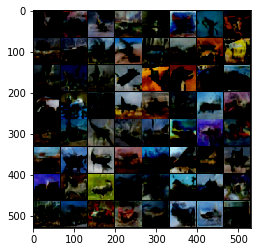

In [0]:
print("Class 0: Airplane")
random_labels_one_hot = get_labels(batch_size, 0)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 1: Automobile


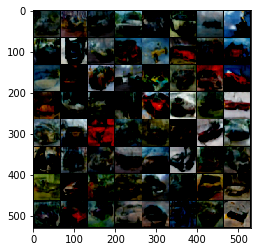

In [0]:
print("Class 1: Automobile")
random_labels_one_hot = get_labels(batch_size, 1)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 2: Bird


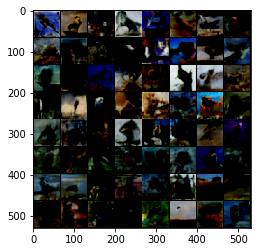

In [0]:
print("Class 2: Bird")
random_labels_one_hot = get_labels(batch_size, 2)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 3: Cat


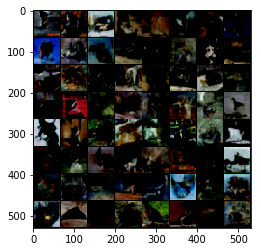

In [0]:
print("Class 3: Cat")
random_labels_one_hot = get_labels(batch_size, 3)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 4: Deer


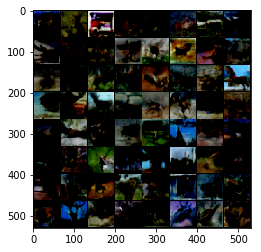

In [0]:
print("Class 4: Deer")
random_labels_one_hot = get_labels(batch_size, 4)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 5: Dog


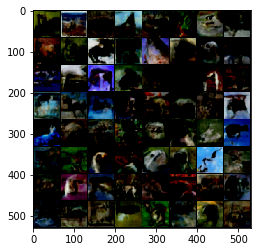

In [0]:
print("Class 5: Dog")
random_labels_one_hot = get_labels(batch_size, 5)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 6: Frog


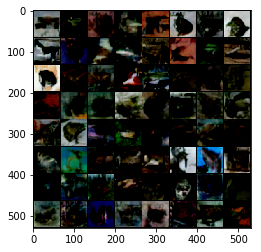

In [0]:
print("Class 6: Frog")
random_labels_one_hot = get_labels(batch_size, 6)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 7: Horse


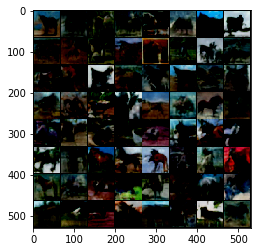

In [0]:
print("Class 7: Horse")
random_labels_one_hot = get_labels(batch_size, 7)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 8: Ship


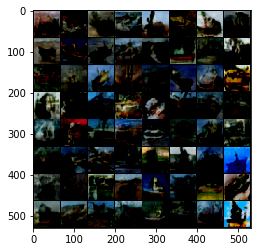

In [0]:
print("Class 8: Ship")
random_labels_one_hot = get_labels(batch_size, 8)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class 9: Truck


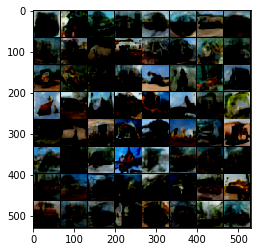

In [0]:
print("Class 9: Truck")
random_labels_one_hot = get_labels(batch_size, 9)
fake = sagan.netG(random_noise(batch_size), random_labels_one_hot)
show_imgs(dev_safe(fake))